#Data Loading

**Using Dataset BBC:**
https://www.kaggle.com/datasets/alfathterry/bbc-full-text-document-classification?select=bbc_data.csv

---

This dataset contains a complete collection of articles categorized into five main classes, namely business, entertainment, politics, sports, and tech. By utilizing this dataset, a classification model will be built to predict the category of an article based on its content, thus helping in efficient document management.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alfathterry/bbc-full-text-document-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\WINDOWS\.cache\kagglehub\datasets\alfathterry\bbc-full-text-document-classification\versions\1


Save the data into drive

In [2]:
import os
import pandas as pd

path = kagglehub.dataset_download("alfathterry/bbc-full-text-document-classification")
print("Path to dataset files:", path)

# List the contents of the downloaded directory
print(os.listdir(path))

# Open the target file using pandas
file_path = os.path.join(path, 'bbc_data.csv')  # Update with the actual file name
df = pd.read_csv(file_path)

Path to dataset files: C:\Users\WINDOWS\.cache\kagglehub\datasets\alfathterry\bbc-full-text-document-classification\versions\1
['bbc_data.csv']


In [3]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#Read Data

In [5]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [6]:
df.isna().sum()

data      0
labels    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#Data Preprocessing

Case Folding:
Mengubah seluruh teks menjadi huruf kecil.

In [8]:
def lower(text):
  text = text.lower()
  return text

df['data'] = df['data'].apply(lower)
df.head()

,data,labels
0,musicians to tackle us red tape musicians gro...,entertainment
1,"u2s desire to be number one u2, who have won ...",entertainment
2,rocker doherty in on-stage fight rock singer ...,entertainment
3,snicket tops us box office chart the film ada...,entertainment
4,"oceans twelve raids box office oceans twelve,...",entertainment


Penghapusan Stopwords dan Noise: Menghilangkan kata umum (stopwords) dan karakter
tidak penting (noise).

In [9]:
clean_spcl = re.compile('[/(){}\|@,;]')
clean_symbol = re.compile('[^0-9a-z\u4000-\u9fff]')

def repunch(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

df['data'] = df['data'].apply(repunch)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\|'
<>:1: SyntaxWarning: invalid escape sequence '\|'
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_9360\1807627145.py:1: SyntaxWarning: invalid escape sequence '\|'
  clean_spcl = re.compile('[/(){}\|@,;]')


,data,labels
0,musicians to tackle us red tape musicians gro...,entertainment
1,u2s desire to be number one u2 who have won t...,entertainment
2,rocker doherty in on stage fight rock singer ...,entertainment
3,snicket tops us box office chart the film ada...,entertainment
4,oceans twelve raids box office oceans twelve ...,entertainment


Clean up whitespace characters within text data

In [10]:
def rewhitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

df['data'] = df['data'].apply(rewhitespace)
df.head()

,data,labels
0,musicians to tackle us red tape musicians grou...,entertainment
1,u2s desire to be number one u2 who have won th...,entertainment
2,rocker doherty in on stage fight rock singer p...,entertainment
3,snicket tops us box office chart the film adap...,entertainment
4,oceans twelve raids box office oceans twelve t...,entertainment


Tokenisasi: Memecah teks menjadi unit kecil (kata/frasa).

In [11]:
from nltk.tokenize import word_tokenize

def token(text):
  text = word_tokenize(text)
  return text

df['data'] = df['data'].apply(token)
df.head()

,data,labels
0,"[musicians, to, tackle, us, red, tape, musicia...",entertainment
1,"[u2s, desire, to, be, number, one, u2, who, ha...",entertainment
2,"[rocker, doherty, in, on, stage, fight, rock, ...",entertainment
3,"[snicket, tops, us, box, office, chart, the, f...",entertainment
4,"[oceans, twelve, raids, box, office, oceans, t...",entertainment


In [12]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Lemmatization: Mengubah kata ke bentuk dasar menurut kamus.

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the part of speech (POS) tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Function to apply lemmatization on each tokenized review
def lemmatize_review(review):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review]

df['data'] = df['data'].apply(lemmatize_review)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,data,labels
0,"[musician, to, tackle, u, red, tape, musician,...",entertainment
1,"[u2s, desire, to, be, number, one, u2, who, ha...",entertainment
2,"[rocker, doherty, in, on, stage, fight, rock, ...",entertainment
3,"[snicket, top, u, box, office, chart, the, fil...",entertainment
4,"[ocean, twelve, raid, box, office, ocean, twel...",entertainment


Stemming: Menghapus imbuhan.

In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_review(review):
    return [stemmer.stem(word) for word in review]

df['data'] = df['data'].apply(stem_review)
df.head()

,data,labels
0,"[musician, to, tackl, u, red, tape, musician, ...",entertainment
1,"[u2, desir, to, be, number, one, u2, who, have...",entertainment
2,"[rocker, doherti, in, on, stage, fight, rock, ...",entertainment
3,"[snicket, top, u, box, offic, chart, the, film...",entertainment
4,"[ocean, twelv, raid, box, offic, ocean, twelv,...",entertainment


# Feature Engineering and Feature Extraction:

Feature Engineering and Feature Extraction Using TF-IDF with n_grams

Using ngram_range=(1,2) where:

1. Unigram (1-gram): individual words
Example: "apple unveils" → ["apple", "unveils"]

2. Bigram (2-gram): pairs of consecutive words
Example: "apple unveils new" → ["apple unveils", "unveils new"]

Extracting both unigrams and bigrams from the text.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2))
review_tf = tf.fit_transform(df['data'].astype('U'))
review_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1156341 stored elements and shape (2225, 309526)>

# Data Modelling

Using **single-label classification** in which model only predicts one category per input

Setting Up label encoder and train_test_split

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(df['labels'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(review_tf, labels_encoded, train_size = 0.8, test_size = 0.2, random_state = 42)

Using 3 types of ensemble model (Bagging, Boosting, Stacking):

Models that will be used:
1. XGBoostClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. LogisticRegression

In [18]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier()
tree_classifier = DecisionTreeClassifier()

## 1. Bagging

Bagging, short for bootstrap aggregating, is a type of ensemble learning that involves training multiple models on different subsets of the training data. The idea behind bagging is to reduce the variance of individual models by training them on different subsets of the data.



Using RandomForestClassifier as the base estimator for the bagging classifier. We set the number of estimators to 10, which means we will train 10 models on different subsets of the data.

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
bag = BaggingClassifier(estimator=rf_classifier, n_estimators=10, random_state=42)

In [22]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [23]:
y_pred = bag.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Model Evaluation
accuracy_bagging = accuracy_score(y_test, y_pred)
print("Bagging Ensemble Accuracy:", accuracy_bagging)
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division = 0))

Bagging Ensemble Accuracy: 0.9393258426966292
Confusion matrix:
 [[101   0   1   0   1]
 [  2  76   3   3   0]
 [  5   0  74   1   0]
 [  1   0   0  97   0]
 [  8   0   0   2  70]]
               precision    recall  f1-score   support

     business       0.86      0.98      0.92       103
entertainment       1.00      0.90      0.95        84
     politics       0.95      0.93      0.94        80
        sport       0.94      0.99      0.97        98
         tech       0.99      0.88      0.93        80

     accuracy                           0.94       445
    macro avg       0.95      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



## 2. Boosting

Boosting is another type of ensemble learning that involves training multiple models sequentially. The idea behind boosting is to focus on the samples that are difficult to classify and improve the accuracy of the model on these samples.

RandomForestClassifier the base estimator for the AdaBoost classifier. We set the number of estimators to 10, which means we will train 10 models sequentially.

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
# Change the model if you want.
# DecisionTreeClassifier got accuracy 85.84%
# RandomForestClassifier got accuracy 93.25%
boost = AdaBoostClassifier(estimator=rf_classifier, n_estimators=10, random_state=42)

In [27]:
boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [28]:
# Model Evaluation
accuracy_boost = accuracy_score(y_test, y_pred)
print("Boosting Ensemble Accuracy:", accuracy_boost)
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division = 0))

Boosting Ensemble Accuracy: 0.9325842696629213
Confusion matrix:
 [[100   0   2   1   0]
 [  0  74   3   7   0]
 [  3   1  76   0   0]
 [  1   0   0  97   0]
 [  9   2   0   1  68]]
               precision    recall  f1-score   support

     business       0.88      0.97      0.93       103
entertainment       0.96      0.88      0.92        84
     politics       0.94      0.95      0.94        80
        sport       0.92      0.99      0.95        98
         tech       1.00      0.85      0.92        80

     accuracy                           0.93       445
    macro avg       0.94      0.93      0.93       445
 weighted avg       0.94      0.93      0.93       445



## 3. Stacking with MultinomialNB and RandomForestClassifier

Stacking is a type of ensemble learning that involves training multiple models and using their predictions as input to another model. The idea behind stacking is to combine the strengths of different models and make more accurate predictions.

1. MultinomialNB : Base Learner
2. RandomForestClassifier : Base Learner
3. LogisticRegression : Meta-learner

Two classifiers (a MultinomialNB and a RandomForestClassifier) and use them to generate predictions for the second subset of the training data. We then combine the predictions of both classifiers and use them as input to LogisticRegression.

In [32]:
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
from sklearn.ensemble import StackingClassifier

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(random_state=42) # Add random_state for reproducibility
meta_learner = LogisticRegression(max_iter=1000, random_state=42) # Set max_iter and random_state

In [33]:
# Create the StackingClassifier
stack_model_mnb_rf = StackingClassifier(
    estimators=[
        ('nb', nb_classifier), # Use MultinomialNB
        ('rf', rf_classifier)  # Use RandomForestClassifier
    ],
    final_estimator=meta_learner,
    cv=5 # You can specify the number of cross-validation folds
)

In [34]:
# Train the StackingClassifier
print("Training the StackingClassifier with MultinomialNB and RandomForestClassifier...")
stack_model_mnb_rf.fit(X_train, y_train)
print("StackingClassifier training complete.")

Training the StackingClassifier with MultinomialNB and RandomForestClassifier...
StackingClassifier training complete.


In [35]:
# Make predictions on the test set
y_pred_stack_mnb_rf = stack_model_mnb_rf.predict(X_test)

In [36]:
# Evaluate the model
accuracy_stack_mnb_rf = accuracy_score(y_test, y_pred_stack_mnb_rf)
print("\nStackingClassifier (MultinomialNB + RandomForestClassifier) Accuracy:", accuracy_stack_mnb_rf)
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred_stack_mnb_rf)}')
print(classification_report(y_test, y_pred_stack_mnb_rf, target_names=le.classes_, zero_division=0))


StackingClassifier (MultinomialNB + RandomForestClassifier) Accuracy: 0.9797752808988764
Confusion matrix:
 [[100   0   2   0   1]
 [  0  83   1   0   0]
 [  2   0  78   0   0]
 [  1   0   0  97   0]
 [  2   0   0   0  78]]
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       103
entertainment       1.00      0.99      0.99        84
     politics       0.96      0.97      0.97        80
        sport       1.00      0.99      0.99        98
         tech       0.99      0.97      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



Out of 4 types of ensemble models,
1. **Stacking ensemble model** using MultinomiaNB, RandomForestClassifier, and LogisticRegression has the most accuracy with **97.97%%**.
2. The second most was **Bagging ensemble model** with **93.93%**.
3. And the last was **Boosting ensemble model** with **93.25%**.

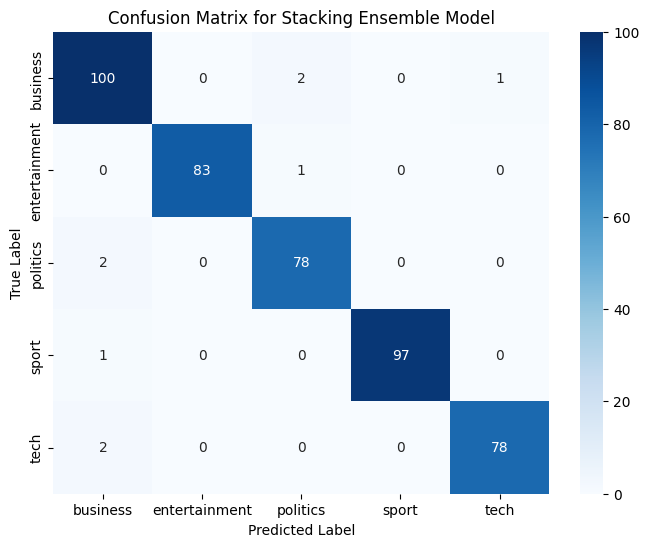

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_stack_mnb_rf)

# Get the class names from your LabelEncoder
class_names = le.classes_

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Ensemble Model')

# Show the plot
plt.show()

# Reference and Export Into PKL File

**Reference**:
- https://mohitmishra786687.medium.com/ensemble-learning-a-beginners-guide-c8d6bf283e6d
- https://www.kaggle.com/code/ahmedxhamada/classification-model-for-the-bbc

In [ ]:
import joblib

# Save the model components
joblib.dump(tf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(stack_model_mnb_rf, 'stack_model_mnb_rf.pkl')
joblib.dump(accuracy_stack_mnb_rf, 'test_accuracy.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(y_pred_stack_mnb_rf, 'y_pred.pkl')

['pkl_file/y_pred.pkl']